In [85]:
!pip install numpy matplotlib scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [86]:
import numpy as np
import matplotlib.pyplot as plt#
from pathlib import Path
from operator import attrgetter
from scipy.signal import savgol_filter

from config import load_from_yaml, Config

In [94]:
method = "DQN"
# hyperparameter = "learning_rate"
# hyperparameter = "epsilon.initial"
hyperparameter = "nn_architecture"



hyperparameter_value_data = {}

for config_path in Path(f"configs/{method}/{hyperparameter}").glob("*.yaml"):
    print(config_path)
    c = load_from_yaml(str(config_path))
    value = attrgetter(hyperparameter)(c)
    
    if isinstance(value, list):
        value = tuple(value)

    print(hyperparameter, value)
    data_path = Path(f"results/{method}/{hyperparameter}/{config_path.stem}.npy")
    hyperparameter_value_data[value] = np.load(data_path)



hyperparameter_values = [] # values of the hyperparameter we iterate in order
data = []

for v,d in sorted(hyperparameter_value_data.items(), key = lambda i: i[0]):
    hyperparameter_values.append(v)
    data.append(d)

data = np.array(data) # transfor python list to numpy array
data.shape

configs/DQN/nn_architecture/nn_architecture-3.yaml
nn_architecture (4, 64, 64, 32, 32, 32, 32, 2)
configs/DQN/nn_architecture/nn_architecture-1.yaml
nn_architecture (4, 500, 500, 250, 250, 32, 32, 2)
configs/DQN/nn_architecture/nn_architecture-4.yaml
nn_architecture (4, 32, 32, 64, 64, 64, 64, 2)
configs/DQN/nn_architecture/nn_architecture-5.yaml
nn_architecture (4, 64, 64, 32, 32, 32, 32, 2)
configs/DQN/nn_architecture/nn_architecture-2.yaml
nn_architecture (4, 32, 32, 32, 32, 32, 32, 32, 2)


(4, 3, 1000)

In [102]:
window_length = 51
avg_data = savgol_filter(np.average(data, axis=1), window_length=window_length, polyorder=1, axis=1)
std_data = savgol_filter(np.std(data, axis=1) / np.sqrt(data.shape[1]), window_length=window_length, polyorder=1, axis=1)

std_data.shape

(4, 1000)

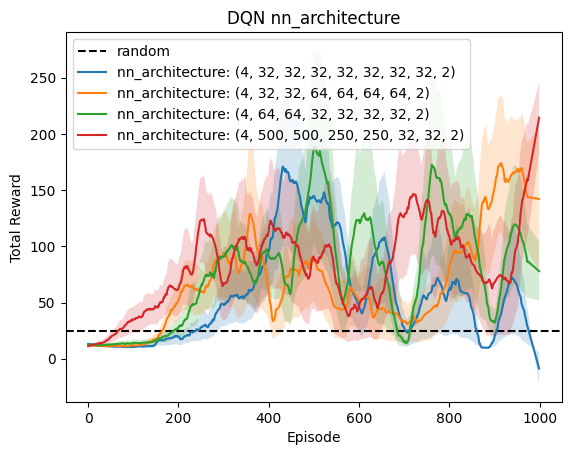

In [105]:
random_agent = 25

fig,ax = plt.subplots()
ax.set_title(f"{method} {hyperparameter}")
ax.set_xlabel('Episode')
ax.set_ylabel('Total Reward')
ax.axhline(random_agent,ls='--',c='k',label="random")



for i,v in enumerate(hyperparameter_values):
    ax.plot(avg_data[i], label=f"{hyperparameter}: {v}")
    ax.fill_between(range(data.shape[2]), avg_data[i]-std_data[i], avg_data[i]+std_data[i], alpha=0.2)

ax.legend()